# IMPORT PACKAGES

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import umap.umap_ as umap
import seaborn as sns
import os
import hdbscan
%matplotlib inline

from sentence_transformers import SentenceTransformer
from fuzzywuzzy import process, fuzz

C:\Users\t-sadash\Anaconda3\envs\muse\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


# READ DATA

In [2]:
df = pd.read_json("./data/covid19_misinformation_tweets.json")

In [3]:
df.head()

,screen_name,party,created_at,id_str,full_text,hashtags,retweet_count,retweet_handle
55,1Patelzuber,INC,2020-03-27 02:51:01,1243369906764013568,its a thread please watch all 3 segments of th...,[],197,Elizatweetz
607,2Suhana25,INC,2020-03-26 05:11:25,1243042852608905216,chinahealthnews chinascio chinadaily china is ...,"[COVID2019, Coronavirus, ChinaVirus19]",0,None
679,2Suhana25,INC,2020-04-04 04:01:12,1246286671781359616,pmoindia narendramodi manojtiwarimp maintaing ...,[CoronaJihad],8,None
682,2Suhana25,INC,2020-04-04 05:12:19,1246304571988660224,pmoindia narendramodi manojtiwarimp maintaing ...,[],8,2Suhana25
816,2Suhana25,INC,2020-04-21 07:30:46,1252500008118685696,woman at rashtrapati bhavan tests positive for...,[coronavirus],32,_iamSA1


In [4]:
df.shape[0]

14592

In [5]:
df = df.drop_duplicates(subset='full_text')

In [6]:
df.shape

(8713, 8)

In [7]:
def fuzzy_matching(x, matches):
    match = process.extractBests(x, df['full_text'].tolist(), scorer=fuzz.token_sort_ratio,
               score_cutoff = 80)
    print(len(match))
    matches.append(match)

In [8]:
matches = []
df['full_text'].apply(lambda x: fuzzy_matching(x,matches))

1
1
1
1
1
1
1
1
1
1
1
1
1
3
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
1
1
1
1
2
2
1
1
1
1
1
1
1
1
1
1
1
1
4
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
3
1
1
1
1
1
1
1
1
2
1
1
4
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
1
1
2
2
1
1
1
1
1
1
1
1
3
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
2
1
1
1
1
1
1
1
1
1
1
5
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
5
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
2
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
3
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
5
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
3
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
4
1
1
1
1
1
1
1
1
1
1
1
5
1


1
4
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
3
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
3
1
1
1
2
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
5
1
3
1
1
5
1
1
2
1
2
2
1
2
1
1
1
1
1
1
1
5
1
1
5
5
5
5
5
5
2
2
1
1
1
2
1
5
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
5
1
1
1
1
2
1
1
1
1
1
2
1
1
1
3
2
4
3
1
1
1
2
1
1
1
1
3
1
1
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
5
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
2
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
3
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
2
2
2
1
1
3
2
1
2
4
2
1
1
1
1
2
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
3
1
1
5
1
5
1
1
2
2
1
1
1
1
1
1
1
1
1
1
1
1
5
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
2
3
1
1
1
1
1
1
1
1
1
1
1
1
1
3
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
4
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
3
1
1
2


1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
2
2
1
1
1
1
1
1
1
4
5
3
4
5
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
3
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
3
3
3
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
3
3
1
1
2
5
5
5
1
5
5
5
5
5
4
5
5
5
5
5
5
5
5
1
1
3
4
1
1
1
1
1
1
2
1
1
1
2
1
1
1
1
1
1
2
1
2
1
1
2
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
3
3
3
3
1
3
1
1
4
2
1
3
1
1
1
1
1
1
1
1
2
4
3
4
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
4
4
4
4
1
1
1


55         None
607        None
679        None
816        None
828        None
           ... 
5928836    None
5928847    None
5928969    None
5929030    None
5929090    None
Name: full_text, Length: 8713, dtype: object

In [133]:
import pickle

with open ('covid19_fuzzy_matches', 'wb') as f:
    pickle.dump(matches,f)

In [9]:
for match in matches:
    if len(match) > 1:
        print(match)
        for i in range(1,len(match)):
            df.drop(df[df['full_text'] == match[i][0]].index, inplace = True)
        print("Deleted {} Rows".format(len(match)-1))

[('absolutely shameful do not tweet corona virus as chinesevirus19 dont say its chinesevirus  virus doesnt belong to any one nation so stop calling it chinavirus either please do not trend chinesevirus19 or chinavirus or chinesevirus samacharsamapthue ', 100), ('absolutely shameful do not tweet corona virus as chinesevirus19 dont say its chinesevirus  virus doesnt belong to any one nation so stop calling it chinavirus either please do not trend chinesevirus19 or chinavirus or chinesevirus samacharsamapthue', 100), ('absolutely shameful do not tweet corona virus as chinesevirus19 dont say its chinesevirus  virus doesnt belong to any one nation so stop calling it chinavirus either please do not trend chinesevirus19 or chinavirus or chinesevirus ', 89)]
Deleted 2 Rows
[('sudhirchaudhary zeenews mohfwindia those who are contacts of covid positive patients working in a channel why theyre not being quarantined or mha led by amitshah drafted different rules for these bootlickers of bjp zeenew

Deleted 2 Rows
[('gt tablighi jamaat faces global backlash gt even malaysian amp pakistani govts blame tablighis for accelerating the spread of covid in the respective countries crackdownontablighis', 100), ('gt tablighi jamaat faces global backlash gt even malaysian amp pakistani govts blame tablighis for accelerating the spread of covid in the respective countries crackdownontablighis republic', 98)]
Deleted 1 Rows
[('gt tablighi jamaat faces global backlash gt even malaysian amp pakistani govts blame tablighis for accelerating the spread of covid in the respective countries crackdownontablighis republic', 100), ('gt tablighi jamaat faces global backlash gt even malaysian amp pakistani govts blame tablighis for accelerating the spread of covid in the respective countries crackdownontablighis', 98)]
Deleted 1 Rows
[('china must be dragged into international court and stripped of its veto power in the un crime against humanity covid19 is a chinese virus chineseviruscorona rt if u agree

Deleted 4 Rows
[('i am a tablighi i am a virus coronavirus coronavillains corona live bombs coronajihad muslim jihadist radicalislamicterror corona carnage by tablighijamat at nizamuddinmarkaz has now been busted  ', 100), ('coronavirus coronavillains corona live bombs coronajihad muslim jihadist radicalislamicterror corona carnage by tablighijamat at nizamuddinmarkaz has now been busted  ', 92), ('rakeshsinha01 coronavirus coronavillains corona live bombs coronajihad muslim jihadist radicalislamicterror corona carnage by tablighijamat at nizamuddinmarkaz has now been busted ', 91), ('thersspiyussh coronavirus coronavillains corona live bombs coronajihad muslim jihadist radicalislamicterror corona carnage by tablighijamat at nizamuddinmarkaz has now been busted  ', 91), ('time to wake up coronavirus coronavillains corona live bombs coronajihad muslim jihadist radicalislamicterror corona carnage by tablighijamat at nizamuddinmarkaz has now been busted  ', 90)]
Deleted 4 Rows
[('coronavi

Deleted 4 Rows
[('corona live bombs jihadist coronavirus coronajihad radicalislamicterror coronavillains tablighsuperspreader corona carnage by tablighijamat at nizamuddinmarkaz has now been busted ', 100), ('sadhvihindu corona live bombs jihadist coronavirus coronajihad radicalislamicterror coronavillains tablighsuperspreader corona carnage by tablighijamat at nizamuddinmarkaz has now been busted', 97), ('sadhvihindu corona live bombs jihadist coronavirus coronajihad radicalislamicterror coronavillains tablighsuperspreader corona carnage by tablighijamat at nizamuddinmarkaz has now been busted ', 97), ('themukesh corona live bombs jihadist coronavirus coronajihad radicalislamicterror coronavillains tablighsuperspreader corona carnage by tablighijamat at nizamuddinmarkaz has now been busted', 97), ('ajazkhanactor corona live bombs jihadist coronavirus coronajihad radicalislamicterror coronavillains tablighsuperspreader corona carnage by tablighijamat at nizamuddinmarkaz has now been bu

Deleted 4 Rows
[('praveen93581375 chinesevirus from wuhan reached milan  15000 km newyork  15000 km itlay 8695 km india  3695 km iran  5667 km no effects in beijing amp shanghai something is wrong  potus is right in blaming china for its biowarfare ungeneva unesco bioweapon corona', 100), ('sanjeev60374403 chinesevirus from wuhan reached milan  15000 km newyork  15000 km itlay 8695 km india  3695 km iran  5667 km no effects in beijing amp shanghai something is wrong  potus is right in blaming china for its biowarfare ungeneva unesco bioweapon corona', 90)]
Deleted 1 Rows
[('shiwanshusing10 chinesevirus from wuhan reached milan  15000 km newyork  15000 km itlay 8695 km india  3695 km iran  5667 km no effects in beijing amp shanghai something is wrong  potus is right in blaming china for its biowarfare ungeneva unesco bioweapon corona', 100), ('chinesevirus from wuhan reached milan  15000 km newyork  15000 km itlay 8695 km india  3695 km iran  5667 km no effects in beijing amp shanghai s

Deleted 3 Rows
[('china must be dragged into international court and stripped of its veto power in the un crime against humanity covid19 is a chinese virus chinesevirus19 ', 100), ('china must be dragged into international court and stripped of its veto power in the un crime against humanity covid19 is a chinese virus chinesevirus19  chinesevirus19', 95), ('china must be dragged into international court and stripped of its veto power in the un crime against humanity covid19 is a chinese virus copy and paste chinesevirus19', 95), ('china must be dragged into international court and stripped of its veto power in the un crime against humanity covid19 is a chinese virus coronavillains', 93), ('china must be dragged into international court and stripped of its veto power in the un crime against humanity covid19 is a chinese virus chineseviruscorona rt if u agree', 93)]
Deleted 4 Rows
[('china must be dragged into international court and stripped of its veto power in the un crime against hum

Deleted 4 Rows
[('covid19 pandemic has provided a window into how a bioterrorist attack might unfold across the world un secretary general antonio guterres bioterrorism ', 100), ('covid19 pandemic has provided a window into how a bioterrorist attack might unfold across the world un chief antonio guterres  bioterrorism ', 92)]
Deleted 1 Rows
[('hundreds of muslims gather at a murshidabad mosque for friday namaaz defying all lockdown and social distancing coronajihad ', 100), ('hundreds of muslims gather at a murshidabad mosque for friday namaaz defying all lockdown and social distancing norms coronajihad ', 98)]
Deleted 1 Rows
[('covid19 pandemic has provided a window into how a bioterrorist attack might unfold across the world un chief antonio guterres  bioterrorism ', 100), ('covid19 pandemic has provided a window into how a bioterrorist attack might unfold across the world un secretary general antonio guterres bioterrorism ', 92)]
Deleted 1 Rows
[('coalition of over 100 countries inc

Deleted 4 Rows
[('coronarovirus  coronavirus bioweapon  how china stole coronavirus from canada and weaponized it ', 100), ('coronavirus bioweapon  how china stole coronavirus from canada and weaponized it coronavirus ', 99), ('coronavirus bioweapon  how china stole coronavirus from canada and weaponized it ', 92), ('coronavirus bioweapon how china stole coronavirus from canada and weaponized it ', 92), ('exclusive coronavirus bioweapon how china stole coronavirus from canada and weaponized it ', 91)]
Deleted 4 Rows
[('sinister coronavirus bioweapon  how china stole coronavirus from canada and weaponized it ', 100), ('coronavirus bioweapon  how china stole coronavirus from canada and weaponized it ', 95), ('coronavirus bioweapon how china stole coronavirus from canada and weaponized it ', 95), ('coronavirus bioweapon  how china stole coronavirus from canada and weaponized it gt', 93), ('coronavirus bioweapon  how china stole coronavirus from canada and weaponized it  realdonaldtrump', 

Deleted 4 Rows
[('frank plummer was the key to the entire investigation on the origins of coronavirus bioweapon but will the canadian government open an investigation into this matter ', 100), ('frankplummer was the key to the entire investigation on the origins of coronavirus bioweapon but will the canadian government open an investigation into this matter ', 95), ('frank plummer was the key to the entire investigation on the origins of coronavirus bioweapon but will the canadian government open an investigation into this matter justintrudeau cafreeland ', 93)]
Deleted 2 Rows
[('it does seem to me that wuhan bsl4 is source of coronavirus my guess is they were researching sars and they weaponize it further by giving it a gain of function properties which means it could be more lethal  bioweapons expert dr francis boyle ', 100), ('it does seem to me wuhan bsl4 is the source of the coronavirus my guess is that they were researching sars and they weaponize it further by giving it a gain o

Deleted 2 Rows
[('coronavirus highriskcovid19 how china france alliance created wuhans bioweapons laboratory ', 100), ('coronavirus how china france alliance created wuhans bioweapons laboratory ', 90), ('coronavirus china and france alliance created wuhans bioweapons laboratory ', 85), ('how china france alliance created wuhans bioweapons laboratory covid2019 ', 83), ('exclusive how the china france alliance created wuhans bioweapons laboratory coronavirus ', 83)]
Deleted 4 Rows
[('the below visualization the secret history of coronavirus is based on greatgameindias exclusive report coronavirus bioweapon  how china stole coronavirus from canada and weaponized it ', 100), ('infographic the below visualization the secret history of coronavirus is based on greatgameindias exclusive report coronavirus bioweapon  how china stole coronavirus from canada and weaponized it ', 97), ('the below visualization the secret history of coronavirus bioweapon is based on greatgameindias exclusive repor

Deleted 4 Rows
[('erin16642105 theeconomist coronavirus bioweapon  how china stole coronavirus from canada and weaponized it ', 100), ('coronavirus bioweapon  how china stole coronavirus from canada and weaponized it ', 86), ('exclusive coronavirus bioweapon thread how china stole coronavirus from canada and weaponized it ', 86), ('coronavirus bioweapon how china stole coronavirus from canada and weaponized it ', 86), ('coronavirus bioweapon  how china stole coronavirus from canada and weaponized it a thread ', 86)]
Deleted 4 Rows
[('frank plummer was the key to the entire investigation on the origins of coronavirus bioweapon but will the canadian government open an investigation into this matter justintrudeau cafreeland ', 100), ('frank plummer was the key to the entire investigation on the origins of coronavirus bioweapon but will the canadian government open an investigation into this matter ', 93), ('frankplummer was the key to the entire investigation on the origins of coronavirus

Deleted 1 Rows
[('alert  covid19 as bioweapon the debate listen in to what dr nishakant ojha advisorcyber security amp counterterrorism west asia amp middle east had to say join anchoranandn on therightstand ', 100), ('alert  covid19 as bioweapon the debate listen in to what dr nishakant ojha advisorcyber security amp counterterrorism west asia amp middle east had to say join the broadcast with anchoranandn ', 93)]
Deleted 1 Rows
[('exclusive  covid a bioweapon chinese virologist li meng speaks to cnnnews18s anchoranandn says coronavirus was discovered by the chinese military china deliberately spread misinformation coronavirusoutbreak ', 100), ('exclusive  covid a bioweapon chinese virologist li meng speaks to cnnnews18s anchoranandn says coronavirus was discovered by the chinese military china deliberately spread misinformation watch the video to know more coronavirusoutbreak ', 93)]
Deleted 1 Rows
[('so is covid19 a bioweapon that was accidentally leaked from the wuhan institute of 

Deleted 2 Rows
[('absolutely shameful do not tweet corona virus as chinesevirus19 dont say its chinesevirus  virus doesnt belong to any one nation so stop calling it chinavirus either please do not trend chinesevirus19 or chinavirus or chinesevirus samacharsamapthue ', 100), ('absolutely shameful do not tweet corona virus as chinesevirus19 dont say its chinesevirus  virus doesnt belong to any one nation so stop calling it chinavirus either please do not trend chinesevirus19 or chinavirus or chinesevirus samacharsamapthue', 100), ('absolutely shameful do not tweet corona virus as chinesevirus19 dont say its chinesevirus  virus doesnt belong to any one nation so stop calling it chinavirus either please do not trend chinesevirus19 or chinavirus or chinesevirus ', 89)]
Deleted 2 Rows
[('mumbaipune express highway closed due to coronavirus  sakalmediaviral news coronavirus covid19 coronavirusupdates covid19india staysafe coronaviruspandemic coronaupdatesinindia covid19india covidiots chines

Deleted 4 Rows
[('चीन ने दुनिया को संकट में डाला  जिस डॉक्टर ने कोरोना के बारे में देश दुनिया को सबसे पहले बताया उसे मार डाला।राक्षसी तरीके से कोरोना को कथित रूप से नियंत्रित किया और अब दुनिया भर  जिसमें भारत अपवाद नहीं है चीन की  कृतज्ञता  से दबे लोग उसका image ठीक करने में लगे हैं   chinavirus', 100), ('चीन ने दुनिया को संकट में डाला  जिस डॉक्टर ने कोरोना के बारे में देश दुनिया को सबसे पहले बताया उसे मार डाला।राक्षसी तरीके से कोरोना को कथित रूप से नियंत्रित किया और अब दुनिया भर  जिसमें भारत अपवाद नहीं है चीन की  कृतज्ञता  से दबे लोग उसका image ठीक करने में लगे हैं   chinavirus ', 100)]
Deleted 1 Rows
[('शांति प्रिय समुदाय के द्वारा मुरादाबाद में जांच के लिए गए डॉक्टरों और पुलिस पर हमला ।। moradabad tablighijamatvirus coronajihad biologicaljihad ', 100), ('शांति प्रिय समुदाय के द्वारा मुरादाबाद में जांच के लिए गए डॉक्टरों और पुलिस पर हमला ।। moradabad tablighijamatvirus coronajihad biologicaljihad  ', 100), ('शांति प्रिय समुदाय के द्वारा मुरादाबाद के हाजी नेब मस्जिद इलाके में जांच के 

Deleted 3 Rows
[('dr_uditraj incindia भारत में कोरोना फैल नहीं रहा बल्कि फैलाया जा रहा है   इसका ताजा उदाहरण निजामुद्दीन से मिले विदेशीयों की जमात हैं 🙄 क्या यह कोई षड्यंत्र के तहत हो रहा जबकि मन्दिर मस्जिद सब बन्द है तो फिर मस्जिदों में विदेशी आकर कैसे छिपे  मस्जिदों_में_सरकारी_ताले_लगाओ', 100), ('भारत में कोरोना फैल नहीं रहा बल्कि फैलाया जा रहा है   इसका ताजा उदाहरण निजामुद्दीन से मिले विदेशीयों की जमात हैं 🙄 क्या यह कोई षड्यंत्र के तहत हो रहा जबकि मन्दिर मस्जिद सब बन्द है तो फिर मस्जिदों में विदेशी आकर कैसे छिपे  मस्जिदों_में_सरकारी_ताले_लगाओ', 95), ('thedeepak2020 real_netan myogiadityanath भारत में कोरोना फैल नहीं रहा बल्कि फैलाया जा रहा है   इसका ताजा उदाहरण निजामुद्दीन से मिले विदेशीयों की जमात हैं 🙄 क्या यह कोई षड्यंत्र के तहत हो रहा जबकि मन्दिर मस्जिद सब बन्द है तो फिर मस्जिदों में विदेशी आकर कैसे छिपे  मस्जिदों_में_सरकारी_ताले_लगाओ', 91), ('65652620 pundirrajesh2 arvindkejriwal भारत में कोरोना फैल नहीं रहा बल्कि फैलाया जा रहा है   इसका ताजा उदाहरण निजामुद्दीन से मिले विदेशीयो

Deleted 1 Rows
[('देशवासियों ये तबलगी_जमात हैं या तालिबानी_जमात हैं   हमको तो ये लोग तालिबानी यो जैसे ही लग रहे हैं   real_jyoti1 sadhvihindu। theatul_ind हरा_कोरोना_जिहाद coronajihad', 100), ('देशवासियों ये तबलगी_जमात हैं या तालिबानी_जमात हैं   हमको तो ये लोग तालिबानी यो जैसे ही लग रहे हैं   हरा_कोरोना_जिहाद coronajihad', 85)]
Deleted 1 Rows
[('मुस्लिम कभी गुज़रात नहीं भूलते मगर हिंदू अपने 7 लाख कश्मीरी हिंदू और 8 हज़ार मासूम सिखों को भूलकर कांग्रेस के साथ है  sadhvihindu real_jyoti1 raghu__charan shuklapinku islamiccoronajehad', 100), ('shilpa_bhartiy मुस्लिम कभी गुज़रात नहीं भूलते मगर हिंदू अपने 7 लाख कश्मीरी हिंदू और 8 हज़ार मासूम सिखों को भूलकर कांग्रेस के साथ है  जयचंद islamiccoronajehad', 82)]
Deleted 1 Rows
[('shilpa_bhartiy मुस्लिम कभी गुज़रात नहीं भूलते मगर हिंदू अपने 7 लाख कश्मीरी हिंदू और 8 हज़ार मासूम सिखों को भूलकर कांग्रेस के साथ है  जयचंद islamiccoronajehad', 100), ('मुस्लिम कभी गुज़रात नहीं भूलते मगर हिंदू अपने 7 लाख कश्मीरी हिंदू और 8 हज़ार मासूम सिखों को भूलकर कांग्र

Deleted 1 Rows
[('कोरोना वायरस भारत की दूसरे नंबर की सबसे बड़ी समस्या है। जाहिल जमाती अभी भी पहले नंबर पर बना हुआ है। jahiljamati जमाती_नहीं_आतंकी_हैं', 100), ('कोरोना_वायरस भारत की दूसरे नंबर की सबसे बड़ी समस्या है   जाहिल जमाती अभी भी पहले नंबर पर बना हुआ है। jahiljamati जमाती_नहीं_आतंकी_है', 98), ('कोरोना वायरस भारत की दूसरे नंबर की सबसे बड़ी समस्या है। जाहिल जमाती अभी भी पहले नंबर पर बना हुआ है। jahiljamati', 91), ('कोरोना वायरस भारत की दूसरे नंबर की सबसे बड़ी समस्या है। जाहिल जमाती अभी भी पहले नंबर पर बना हुआ है। jahiljamati 😠😠', 91), ('कोरोना वायरस भारत की दूसरे नंबर की सबसे बड़ी समस्या है। जाहिल जमाती अभी भी पहले नंबर पर बने हुवे हैं। jahiljamati', 89)]
Deleted 4 Rows
[('देश के दो प्रमुख महानगर एक मुख्यमंत्री arvindkejriwal और दूसरे मुख्यमंत्री officeofut दोनो जगहों पर लॉकडाऊन फेल दोनो जगहों पर जाहिल_जमात को छूट दे कर सिर्फ राज्य ही नही पूरे देश को कोरोना के सकंट मे डाल दिया।कुछ जाहिलो के चक्कर मे पुरा देश परेशान हैं घरमेंरहेंस्वस्थरहें', 100), ('देश के दो प्रमुख महानगर एक मुख्य

Deleted 3 Rows
[('ashokgehlot51 कोरोना वायरस भारत की दूसरे नंबर की सबसे बड़ी समस्या है। जाहिल जमाती अभी भी पहले नंबर पर बना हुआ है। jahiljamati', 100), ('कोरोना वायरस भारत की दूसरे नंबर की सबसे बड़ी समस्या है। जाहिल जमाती अभी भी पहले नंबर पर बना हुआ है। jahiljamati', 93), ('कोरोना वायरस भारत की दूसरे नंबर की सबसे बड़ी समस्या है। जाहिल जमाती अभी भी पहले नंबर पर बना हुआ है। jahiljamati 😠😠', 93), ('कोरोना वायरस भारत की दूसरे नंबर की सबसे बड़ी समस्या है। जाहिल जमाती अभी भी पहले नंबर पर बने हुवे हैं। jahiljamati', 91), ('sambitswaraj agrawalamit17 कोरोना वायरस भारत की दूसरे नंबर की सबसे बड़ी समस्या है। जाहिल जमाती अभी भी पहले नंबर पर बना हुआ है। jahiljamati', 87)]
Deleted 4 Rows
[('असम के जोरहाट में lockdown के दौरान rss के स्वयंसेवक भोजन की आपूर्ति करते हुए। chinesevirus covid19 ', 100), ('असम के जोरहाट में lockdown के दौरान rss के स्वयंसेवक भोजन की आपूर्ति करते हुए। chinesevirus covid19 campaignannadata ', 91)]
Deleted 1 Rows
[('uttar pradesh   शांति प्रिय समुदाय के द्वारा मुरादाबाद के हा

Deleted 1 Rows
[('gautamtanwar_ नफरत फैलाने वाले  धार्मिक भावना भड़काने वाले  जहर उगलने वाले और आपसी सद्भाव को बिगाड़ने वाले एजाज खान जैसे लोगो की जगह सिर्फ जेल में है। ऐसे लोगो को जेल की सलाखों के पीछे होना चाहिये। अरेस्ट_एजाज_खान covid_19 indiafightscoronavirus', 100), ('नफरत फैलाने वाले  धार्मिक भावना भड़काने वाले  जहर उगलने वाले और आपसी सद्भाव को बिगाड़ने वाले एजाज खान जैसे लोगो की जगह सिर्फ जेल में है। ऐसे लोगो को जेल की सलाखों के पीछे होना चाहिये। अरेस्ट_एजाज_खान covid_19 indiafightscoronavirus', 97), ('नफरत फैलाने वाले  धार्मिक भावना भड़काने वाले  जहर उगलने वाले और आपसी सद्भाव को बिगाड़ने वाले एजाज खान जैसे लोगो की जगह सिर्फ जेल में है। ऐसे लोगो को जेल की सलाखों के पीछे होना चाहिये। अरेस्ट_एजाज_खान covid_19 indiafightscoronavirus ', 97), ('नफरत फैलाने वाले  धार्मिक भावना भड़काने वाले  जहर उगलने वाले और आपसी सद्भाव को बिगाड़ने वाले एजाज खान जैसे लोगो की जगह सिर्फ जेल में है। ऐसे लोगो को जेल की सलाखों के पीछे होना चाहिये। अरेस्ट_एजाज_खान covid_19 indiafightscoronavirus ashokgoelbj

Deleted 1 Rows
[('आंकड़े कहते हैं   अगर यह जाहिल_जमात ना होती अब तक हम कोरोना से निपट चुके होते    रिप्लाई 💬✍️ हां नहीं', 100), ('मित्रों     आंकड़े कहते हैं   अगर यह जाहिल_जमात ना होती अब तक हम कोरोना से निपट चुके होते।     yes  no', 86), ('आंकड़े कहते हैं   अगर यह जाहिल_जमात ना होती तो अब तक हम कोरोना से निपट चुके होते  हाँ या ना में जवाब दो😣😡', 86)]
Deleted 2 Rows
[('मा narendramodi amitshah जी और क्या क्या बरदाश करना पडेगा हमारे भाई बहनो को  हमारे डॉक्टर नर्सेस को  कब तक ऐसेही सहते रहे  हमारी आपसे दरखास्त है की इनको इनकी जगाह दिखाईये   जय हिंद निजामुद्दीन दरगाह तब्लीगी_जमात_जिहाद कोरोना coronaalert coronavirusupdate ', 100), ('माननीय narendramodi amitshah jpnadda जी और क्या क्या बरदाश करना पडेगा हमारे भाई बहनो को  हमारे डॉक्टर नर्सेस को  कब तक ऐसेही सहते रहे  हमारी आपसे दरखास्त है की इनको इनकी जगाह दिखाईये   जय हिंद निजामुद्दीन दरगाह तब्लीगी_जमात_जिहाद कोरोना coronaalert coronavirusupdates ', 97)]
Deleted 1 Rows
[('पहले पत्थर और बम फेंकते थे  अब कोरोना बांट रहे हैं     रिश्ता वही स

Deleted 2 Rows
[('देश के दो प्रमुख महानगर एक मुख्यमंत्री arvindkejriwal और दूसरे मुख्यमंत्री officeofut दोनो जगहों पर लॉकडाऊन फेल दोनो जगहों पर जाहिल_जमात को छूट दे कर सिर्फ राज्य ही नही पूरे देश को कोरोना के सकंट मे डाल दिया।कुछ जाहिलो के चक्कर मे पुरा देश परेशान हैं घरमेंरहेंस्वस्थरहें', 100), ('देश के दो प्रमुख महानगर एक मुख्यमंत्री arvindkejriwal और दूसरे मुख्यमंत्री officeofut दोनो जगहों पर लॉकडाऊन फेल दोनो जगहों पर जाहिल_जमात को छूट दे कर सिर्फ राज्य ही नही पूरे देश को कोरोना के सकंट मे डाल दिया।कुछ जाहिलो के चक्कर मे पुरा देश परेशान हैं घरमेंरहेंस्वस्थरहें ', 100)]
Deleted 1 Rows
[('नासमझ है बेचारा 😴 जस्टिन ब्रो  हमारे यहां की तबलीगी_जमात से कुछ सीखो 🤗 कि कैसे   coronavirus फैलाया जाता है   पहले खुद को संक्रमित करो   अपने साथ वालों को संक्रमित करो और फिर चारों ओर फैल जा़ओ 😏 nizamuddinmarkaj tablighijamatvirus', 100), ('etnow नासमझ है बेचारा 😴 जस्टिन ब्रो  हमारे यहां की तबलीगी_जमात से कुछ सीखो 🤗 कि कैसे   coronavirus फैलाया जाता है   पहले खुद को संक्रमित करो   अपने साथ वालों को स

Deleted 1 Rows
[('डब्ल्यूएचओ से अमेरिका नाराज   ट्रम्प ने विश्व स्वास्थ्य संगठन को चीन केंद्रित बताया  फंडिंग रोकने की धमकी दी  chinavirus who coronapandemic coronaupdates realdonaldtrump china  dainikbhaskar', 100), ('डब्ल्यूएचओ से अमेरिका नाराज   ट्रम्प ने विश्व स्वास्थ्य संगठन को चीन केंद्रित बताया  फंडिंग रोकने की धमकी दी  chinavirus who coronapandemic coronaupdates realdonaldtrump china ', 96)]
Deleted 1 Rows
[('जयपुर के sms मेडिकल कालेज की कैंटीन का शांतिप्रिय कर्मचारी पॉजिटिव निकला  चिकित्सकों को खाना सप्लाई करता था। जयपुर के एक मुहल्ले रामगंज में जमात से जुड़े 74 कोरोना पोसिटिव मरीज मिले तो राज्य में आंकड़े छिपाने के लिए गहलोत नें डेटा से मरकज का कॉलम हटाया। coronajihad का प्रकोप ', 100), ('जयपुर के sms मेडिकल कालेज की कैंटीन का शांतिप्रिय कर्मचारी पोसिटिव निकला  चिकित्सकों को खाना सप्लाई करता था। जयपुर के एक मुहल्ले रामगंज में जमात से जुड़े 74 कोरोना पोसिटिव मरीज मिले तो राज्य में आंकड़े छिपाने के लिए गहलोत नें डेटा से मरकज का कॉलम हटाया। coronajihad का प्रकोप ', 99)]
Deleted 

Deleted 2 Rows
[('भाजपा_मुजफ्फरपुर वार्ड 20 व वार्ड 23 में सैकड़ों जरूरतमंदो के बीच भाजपा जिला अध्यक्ष बड़े भाई bjpranjankumar जी के नेतृत्व में खाद्य समाग्री का वितरण किया गया। indiafightscoronajihad ', 100), ('भाजपामुजफ्फरपुर वार्ड 30 वार्ड 10 व पूर्वी नगर मंडल में सैकड़ों जरूरतमंदो के बीच भाजपा जिला अध्यक्ष बड़े भाई bjpranjankumar जी के नेतृत्व में खाद्य समाग्री का वितरण किया गया। indiafightscoronajihad ', 93)]
Deleted 1 Rows
[('बिना प्लानिंग 20 बच्चे पैदा करने वाले बोल रहे हैं मोदी ने बिना प्लानिंग लोकडाऊन किया है ☺ islamiccoronajehad', 100), ('बिना प्लानिंग 20 बच्चे पैदा करने वाले बोल रहे हैं  मोदी ने बिना प्लानिंग लोकडाऊन किया है   नशा उतार के बोला करो नमूनों क वो 😂😂😂😂 islamiccoronajehad', 88)]
Deleted 1 Rows
[('हम कागज़ नहीं दिखायेंगे    हम नाम नहीं बतायेंगे    पर देश मे मुफ़्त का माल जरुर    उड़ायेंगे   😁😁😁 tablighijamaat coronajihaad', 100), ('हम कागज़ नहीं दिखायेंगे    हम नाम नहीं बतायेंगे    पर मुफ़्त का माल जरुर    उड़ायेंगे   😁😁😁 tablighijamaat coronajihaad', 97)]
Deleted 

Deleted 2 Rows
[('pakistan को भी hydroxychloroquine कि जरुरत है। लेकिन स्पेलिंग ना आने कि वजह से मांग नही पा रहे है। 🤣🤣 imrankhanpti का दर्द 🤣😆😆 coronainpakistan covid19 आक_थू_जिहादी stayhomestaysafe jihadivirus lockdown tamrakaranjay', 100), ('pakistan को भी hydroxychloroquine कि जरुरत है। लेकिन स्पेलिंग ना आने कि वजह से मांग नही पा रहे है। 🤣🤣 imrankhanpti का दर्द 🤣😆😆 coronainpakistan covid19 आक_थू_जिहादी stayhomestaysafe jihadivirus lockdown anuraagmuskaan rubikaliyaquat sushantbsinha askzee ', 85)]
Deleted 1 Rows
[('pakistan को भी hydroxychloroquine कि जरुरत है। लेकिन स्पेलिंग ना आने कि वजह से मांग नही पा रहे है। 🤣🤣 imrankhanpti का दर्द 🤣😆😆 coronainpakistan covid19 आक_थू_जिहादी stayhomestaysafe jihadivirus lockdown anuraagmuskaan rubikaliyaquat sushantbsinha askzee ', 100), ('pakistan को भी hydroxychloroquine कि जरुरत है। लेकिन स्पेलिंग ना आने कि वजह से मांग नही पा रहे है। 🤣🤣 imrankhanpti का दर्द 🤣😆😆 coronainpakistan covid19 आक_थू_जिहादी stayhomestaysafe jihadivirus lockdown tamraka

Deleted 3 Rows
[('जो देश से करते है प्यार वो घर बैठने से कैसे करे इन्कार    हम बैठे है घर पर क्यों की हम नही है गद्दार    indiafightscorona stayawarestaysafe coronajihad', 100), ('जो देश से करते है प्यार वो घर बैठने से कैसे करे इन्कार    हम बैठे है घर पर क्यों की हम नही है गद्दार    indiafightscorona stayawarestaysafe coronajihad ', 100)]
Deleted 1 Rows
[('कुछ लोग थाली पीटकर बदनाम हो गए  कुछ डॉक्टरों को पीटकर भी मासूम बने रहे 🤯 9baje9minutes corona live bombs jihadist coronavirus coronajihad radical_islamic_terror coronavillains tablighsuperspreader tablighijamat at nizamuddinmarkaz ', 100), ('saamanaonline कुछ लोग थाली पीटकर बदनाम हो गए  कुछ डॉक्टरों को पीटकर भी मासूम बने रहे 🤯 9baje9minutes corona live bombs jihadist coronavirus coronajihad radical_islamic_terror coronavillains tablighsuperspreader corona carnage by tablighijamat at nizamuddinmarkaz', 93)]
Deleted 1 Rows
[('saamanaonline कुछ लोग थाली पीटकर बदनाम हो गए  कुछ डॉक्टरों को पीटकर भी मासूम बने रहे 🤯 9baje9minutes corona liv

Deleted 1 Rows
[('वह समय भी दूर नहीं है अगर कोई मौलाना कह दे कोरोना से मरने पर 72 हूरें हैं मिलती हैं   यह जाहिल एक दूसरे को चूम कर मर जाएंगे       nizamuddinidiots nizamuddin', 100), ('वह समय भी दूर नहीं है अगर कोई मौलाना कह दे कोरोना से मरने पर 72 हूरें मिलती हैं  यह जाहिल एक दूसरे को चूम कर मर जाएंगे    😂 ग्रीन_कोरोना_वायरस nizamuddinidiots', 89), ('islamiccoronajehad वह समय भी दूर नहीं है अगर कोई मौलाना कह दे कोरोना से मरने पर 72 हूरें हैं मिलती हैं तो ये जाहिल एक दूसरे को चूम चूम कर मर जाएंगे  😂', 83)]
Deleted 2 Rows
[('31 मार्च 2020 के भारत में 5 बात साफ हैं कि कुछ लोग  1  कागज नहीं दिखाएंगे 2  लॉकडाउन नही मानेंगे 3  कोरोना के संदिग्धों को छिपाएंगे 4  सरकारी सुविधाएं लेने में सबसे आगे कूद के आएंगे 5  चाहे कितना भी बड़ा संकट हो देश की ही लंका लगाएंगे coronajihad', 100), ('1  कागज़ नहीं दिखाएंगे 2  लॉक डाउन नहीं मानेंगे 3  कोरोना के संदिग्धों को छिपाएंगे 4  सरकारी सुविधाएँ लेने में सबसे आगे कूद के आएंगे 5  चाहे कितना भी बड़ा संकट हो देश की ही लंका लगाएंगे  coronajihad', 87), ('31 म

Deleted 1 Rows
[('omthanvi ranaayyub sandeep_news24 पर्यटक वीजा पर आकर आतंक फैलाना  सुसाइड कोरोना बॉम्बर तैयार करने से बड़े साहस का काम थोड़े ही है ये पत्रकारिता।tablighijamat coronajihad', 100), ('ranaayyub omthanvi sandeep_news24 पर्यटक वीजा पर आकर आतंक फैलाना  सुसाइड कोरोना बॉम्बर तैयार करने से बड़े साहस का काम थोड़े ही है ये पत्रकारिता।tablighijamat coronajihad', 100)]
Deleted 1 Rows
[('aajtak पर्यटक वीजा पर आना दावत ए तबलीग धर्मांतरण करना।फिर कोरोना जिहाद फैलाना।यह देश के संविधान में कहां लिखा है coronajihad tablighijamaat', 100), ('balbirpunj पर्यटक वीजा पर आना दावत ए तबलीग धर्मांतरण करना।फिर कोरोना जिहाद फैलाना।यह देश के संविधान में कहां लिखा है coronajihad tablighijamaat', 95), ('anuraagmuskaan पर्यटक वीजा पर आना दावत ए तबलीग धर्मांतरण करना।फिर कोरोना जिहाद फैलाना।यह देश के संविधान में कहां लिखा है coronajihad tablighijamaat', 95), ('shahid_siddiqui पर्यटक वीजा पर आना दावत ए तबलीग धर्मांतरण करना।फिर कोरोना जिहाद फैलाना।यह देश के संविधान में कहां लिखा है coronajihad tablighijama

Deleted 3 Rows
[('sushantbsinha हज़रत निज़ामुद्दीन दरगाह से मिले 170 कोरोना मरीज  100 विदेशी   मंदिरों से दान आ रहे हैं   मस्जिद दरगाहों से मानव बम   nizamuddinmarkaz coronajihad', 100), ('हज़रत निज़ामुद्दीन दरगाह से मिले 170 कोरोना मरीज  100 विदेशी   मंदिरों से दान आ रहे हैं   मस्जिद दरगाहों से मानव बम   nizamuddinmarkaz coronajihad', 95), ('iminakshijoshi हज़रत निज़ामुद्दीन दरगाह से मिले 170 कोरोना मरीज  100 विदेशी   मंदिरों से दान आ रहे हैं   मस्जिद दरगाहों से मानव बम   nizamuddinmarkaz coronajihad', 90), ('kapilmishra_ind हज़रत निज़ामुद्दीन दरगाह से मिले 170 कोरोना मरीज  100 विदेशी   मंदिरों से दान आ रहे हैं   मस्जिद दरगाहों से मानव बम   nizamuddinmarkaz coronajihad', 89)]
Deleted 3 Rows
[(' कागज क्यूँ नहीं दिखाएंगे  समझ रहे हैं न देशवासियों  coronajihad indiafightscorona', 100), (' कागज क्यूँ नहीं दिखाएंगे  समझ रहे हैं न देशवासियों  तबलीगी_शैतान_केजरी_हैवान coronajihad indiafightscorona', 85)]
Deleted 1 Rows
[('तमिलनाडू में 110 नये कोरोना मरीज मिले। ये सारे निजामुद्दीन के तबलीगी ज

Deleted 2 Rows
[('मैं हैरान हूँ  तब्लीगी जमात ने कितना नुक़सान कर दिया  मुल्क के बाहर से लोग आए  अपने साथ कोरोना लाए  उन्होंने इसे छिपाया  ना जाने कितनों तक पहुँचाया  कई लोगों को मौत दे दी  इतनी बड़ी लापरवाही  आख़िर क्यों  tablighijamat delhi coronajihad', 100), ('मैं हैरान हूँ  तब्लीगी जमात ने कितना नुक़सान कर दिया  मुल्क के बाहर से लोग आए  अपने साथ कोरोना लाए  उन्होंने इसे छिपाया  ना जाने कितनों तक पहुँचाया  कई लोगों को मौत दे दी  इतनी बड़ी लापरवाही  आख़िर क्यों  coronajihad', 95)]
Deleted 1 Rows
[('जिहाद का नया रूप  देश की कई मस्जिदों में विदेशी कोरोना से संक्रमित बुलाकर उन्हें छुपाया गया  फिर सैकड़ों लोगों को बुलाकर उन्हें कोराना जिहादी बनाकर देशभर में भेजा गया छत्तीसगढ़ में भी जमाती वायरस मिलने लगे हैं। 😡😡 कोरोना_जमाती_वायरस ', 100), ('जिहाद का नया रूप  देश की कई मस्जिदों में विदेशी कोरोना से संक्रमित बुलाकर उन्हें छुपाया गया फिर सैकड़ों लोगों को बुलाकर उन्हें कोराना जिहादी बनाकर देशभर में भेजा गया  कोरोना_जमाती_वायरस ', 90)]
Deleted 1 Rows
[('बिरयानी मांगेगे नहीं मिलने पर अस्पताल

Deleted 4 Rows
[('केरल में कोरोना वायरस संक्रमित ब्रिटिश रोगी को दी गई एचआईवी की दवाएं lockdown21 chinesevirus19 covid2019 stopthespreadofcorona coronaviruslockdown 21dayslockdown curfewinindia lockdownindia stayhomeindia ', 100), ('ज्यादा स्मार्ट बनने की सजा झेल रहा है भारत lockdown21 chinesevirus19 covid2019 stopthespreadofcorona coronaviruslockdown 21dayslockdown curfewinindia lockdownindia stayhomeindia ', 88), ('कोरोना वायरस  पहली बार देश में बनी कोरोना जांच किट mohfw_india lockdown21 chinesevirus19 covid2019 stopthespreadofcorona coronaviruslockdown 21dayslockdown curfewinindia lockdownindia stayhomeindia ', 87), ('कोरोना की वजह से इन पांच देशों में हुई है सबसे अधिक मौतें lockdown21 chinesevirus19 covid2019 stopthespreadofcorona coronaviruslockdown 21dayslockdown curfewinindia lockdownindia stayhomeindia ', 87), ('कोरोना वायरस ने इस समय पूरी दुनिया में हाहाकार मचा रखा है। lockdown21 chinesevirus19 covid2019 stopthespreadofcorona coronaviruslockdown 21dayslockdown curfewinindia lo

Deleted 3 Rows
[('देश में कोरोना के मामले जमात की वजह से बढ़े  बड़ी बहस nishantchat के साथ सिर्फ tv9bharatvarsh पर  pushpeshpant   officialmanuu live 📺    tablighijamaat   covid19   markazcovidspread ', 100), ('देश के लॉकडाउन का मुजरिम तबलीगी जमात है  बड़ी बहस nishantchat के साथ सिर्फ tv9bharatvarsh पर  pushpeshpant   officialmanuu live 📺    tablighijamaat   covid19   markazcovidspread ', 91), ('जमातियों की बदतमीजी का क्या है इलाज  बड़ी बहस nishantchat के साथ सिर्फ tv9bharatvarsh पर  pushpeshpant   officialmanuu live 📺    tablighijamaat   covid19   markazcovidspread ', 90), ('दो मोर्चे पर लड़ता देश  देना होगा सख्त संदेश  बड़ी बहस nishantchat के साथ सिर्फ tv9bharatvarsh पर  pushpeshpant   officialmanuu live 📺    tablighijamaat   covid19   markazcovidspread ', 88)]
Deleted 3 Rows
[('जमातियों की बदतमीजी का क्या है इलाज  बड़ी बहस nishantchat के साथ सिर्फ tv9bharatvarsh पर  pushpeshpant   officialmanuu live 📺    tablighijamaat   covid19   markazcovidspread ', 100), ('देश के लॉकडाउन का मुजरि

Deleted 4 Rows
[('पटना से लेकर तमिलनाडु तक मस्जिदों के अंदर से विदेशी मुस्लिम नागरिक निकल रहे हैं  ये सभी टूरिस्ट वीजा पर भारत आए थे और बिना स्थानीय पुलिस की जानकारी  मस्जिदों में पहुंच गए  क्यों  मस्जिदों में इनके ठहरने का क्या सबब है   coronajihaad covid19pandemic', 100), ('पटना से लेकर तमिलनाडु तक मस्जिदों के अंदर से विदेशी मुस्लिम नागरिक निकल रहे हैं  ये सभी टूरिस्ट वीजा पर भारत आए थे और बिना स्थानीय पुलिस की जानकारी  मस्जिदों में पहुंच गए  मस्जिदों में इनके ठहरने का क्या सबब है  coronavillains covidiots chinesevirus', 87), ('पटना से लेकर तमिलनाडु तक मस्जिदों के अंदर से विदेशी मुस्लिम नागरिक निकल रहे हैं  ये सभी टूरिस्ट वीजा पर भारत आए थे और बिना स्थानीय पुलिस की जानकारी  मस्जिदों में पहुंच गए  मस्जिदों में इनके ठहरने का क्या सबब है   coronavillains covidiots chinesevirus', 87)]
Deleted 2 Rows
[('coronavirusoubreak भारत में कोरोना के मामले बढ़े कुल 694 मामले सामने आए। अब तक कुल डेथ  16 ठीक हुए   45 coronavillains coronavirusindia coronaupdatesindia indiafightscorona', 100), ('coron

Deleted 2 Rows
[('जमात ने देश को स्टेज  3 के मुहाने पर धकेल दिया है  अड़ी क्योंकि हमें है देश की पड़ी ✧ dineshgautam1 के साथ सिर्फ tv9bharatvarsh पर  shaziailmi   qasmimufti   ansarraza16   fatimarasoolsi1 live 📺    maulanasaad   markazcovidspread   covid19 ', 100), ('देश को खतरे में डालने वालों पर क्यों ना हो कार्रवाई  अड़ी क्योंकि हमें है देश की पड़ी ✧ dineshgautam1 के साथ सिर्फ tv9bharatvarsh पर  shaziailmi   qasmimufti   ansarraza16   fatimarasoolsi1 live 📺    tablighijamaat   markazcovidspread ', 82), ('तबलीगी ने टेंशन बढ़ाई    स्टेज थ्री का खतरा हाई  अड़ी क्योंकि हमें है देश की पड़ी ✧ dineshgautam1 के साथ सिर्फ tv9bharatvarsh पर  adi shaziailmi   qasmimufti   ansarraza16   fatimarasoolsi1 live 📺    tablighijamaat   markazcovidspread ', 80)]
Deleted 2 Rows
[('जारी है मरकज का लुका छिपी खेल    लॉकडाउन ना हो जाए फेल  अड़ी क्योंकि हमें है देश की पड़ी ✧ dineshgautam1 के साथ सिर्फ tv9bharatvarsh पर  shaziailmi   qasmimufti   ansarraza16   fatimarasoolsi1 live 📺    markazcovidspread   ta

Deleted 1 Rows
[('रेपो रेट में 75 बेसिस पॉइंट की कटौती  5 15 से घटाकर 4 45 की गई  आरबीआई ने रिवर्स रेपो रेट में भी 90 बेसिस पॉइंट की कटौती करते हुए 4 प्रतिशत किया  covid2019 stayhomeindia chinesevirus coronavirusoutbreak', 100), ('breakingnews — रेपो रेट में 75 बेसिस पॉइंट की कटौती  5 15 से घटाकर 4 45 की गई  आरबीआई ने रिवर्स रेपो रेट में भी 90 बेसिस पॉइंट की कटौती करते हुए 4 प्रतिशत किया  covid2019 stayhomeindia chinesevirus coronavirusoutbreak', 97)]
Deleted 1 Rows
[('zeenews aditi_tyagi क्या china का समर्थन करते ये लोग फिर 1962 दोहराना चाहते हैं  boycottchina chinamustpay hanta_virus chinesecoronavirus chinavirusmadeinchina ', 100), ('क्या china का समर्थन करते ये लोग फिर 1962 दोहराना चाहते हैं  boycottchina chinamustpay hanta_virus chinesecoronavirus chinavirusmadeinchina ', 93)]
Deleted 1 Rows
[('क्या china का समर्थन करते ये लोग फिर 1962 दोहराना चाहते हैं  boycottchina chinamustpay hanta_virus chinesecoronavirus chinavirusmadeinchina ', 100), ('zeenews aditi_tyagi क्या china का समर्

Deleted 4 Rows
[('आनंद विहार बस अड्डे पर हज़ारों की भीड़  अफरातफरी  coronalockdown coronaupdate coronavirusoutbreak covid2019 chinesevirus coronachainscare coronaviruspandemic', 100), ('ये कैसा राहत पैकेज  पहले की योजनाओं को भी बता दिया लॉकडाउन के लिए मदद  coronalockdown coronaupdate coronavirusoutbreak covid2019 chinesevirus coronachainscare coronaviruspandemic', 83), ('अमेरिका में कोरोना से नवजात की मौत  शिशु मृत्यु का पहला मामला  coronalockdown coronaupdate coronavirusoutbreak covid2019 chinesevirus coronachainscare coronaviruspandemic', 83), ('कोरोना से लड़ने के लिए भारत को चाहिए 3 80 करोड़ मास्क  coronalockdown coronaupdate coronavirusoutbreak covid2019 chinesevirus coronachainscare coronaviruspandemic', 83), ('कोरोना पर ऊहान में जाँच हो  जैव हथियार संधि होती तो चीन की पोल खुल जाती  coronalockdown coronaupdate coronavirusoutbreak covid2019 chinesevirus coronachainscare coronaviruspandemic ', 82)]
Deleted 4 Rows
[('लॉकडाउन  दिल्ली से घर लौट रहे डेलीवरी एजेंट की मौत  200 किमी चला था

Deleted 4 Rows
[('जो प्रवासी मजदूर भाड़ा नहीं चुका पाएंगे  उनका भाड़ा दिल्ली सरकार चुकाएगी।  coronalockdown coronaupdate coronavirusoutbreak covid2019 chinesevirus coronachainscare coronaviruspandemic arvindkejriwal', 100), ('ये कैसा राहत पैकेज  पहले की योजनाओं को भी बता दिया लॉकडाउन के लिए मदद  coronalockdown coronaupdate coronavirusoutbreak covid2019 chinesevirus coronachainscare coronaviruspandemic', 84), ('कोरोना से लड़ने के लिए भारत को चाहिए 3 80 करोड़ मास्क  coronalockdown coronaupdate coronavirusoutbreak covid2019 chinesevirus coronachainscare coronaviruspandemic', 83), ('नीतीश कुमार   प्रवासी मजदूरों के लिए बसें चलाने से फैलेगा कोरोना संक्रमण  coronalockdown coronaupdate coronavirusoutbreak covid2019 chinesevirus coronachainscare coronaviruspandemic nitishkumar', 81), ('लॉकडाउन  दिल्ली से घर लौट रहे डेलीवरी एजेंट की मौत  200 किमी चला था पैदल  coronalockdown coronaupdate coronavirusoutbreak covid2019 chinesevirus coronachainscare coronaviruspandemic', 81)]
Deleted 4 Rows
[('कोरो

Deleted 3 Rows
[('पहले मुल्लों को लव जिहाद के पैसे मिलते थे  अब क्या इन्हें थूकने के पैसे मिल रहे है   coronajihaad coronavillains ipraveendixit victoriousnamo prayagrajwale shuklapinku jeetensingh theanujbajpai ramsabjym real_netan dixit_511 dixit5_11 ishkarnbhandari ', 100), ('पहले मुल्लों को लव जिहाद के पैसे मिलते थे  अब क्या इन्हें थूकने के पैसे मिल रहे है   coronajihaad coronavillains ipraveendixit victoriousnamo prayagrajwale shuklapinku jeetensingh theanujbajpai ramsabjym real_netan  जेहादी_जमाती', 85)]
Deleted 1 Rows
[('कोरोना के कारण अमरीका में 22 हज़ार से अधिक मौतें  ब्रिटेन में भी मौतों का आंकड़ा 10 500 के पार पहुंचा सोचो अपना देश कितना सुरक्षित है अगर तबलीगी जमात ने करोना बम ना छोड़ा होता तो अब तक हम इस विपदा से उबर गए होते     तबलीगी_जिहादी_जमात', 100), ('कोरोना के कारण अमरीका में     22 हज़ार से अधिक मौतें  ब्रिटेन में भी     मौतों का आंकड़ा 10 500 के पार पहुंचा सोचो अपना देश कितना सुरक्षित है      अगर तबलीगी_जमात ने करोना बम ना छोड़ा होता तो अब तक हम इस विपदा से उबर गए ह

In [10]:
df.shape

(7817, 8)

# DOWNLOAD MUSE

In [11]:
muse = SentenceTransformer('distiluse-base-multilingual-cased-v2')

In [12]:
def embed(sentences):
    return muse.encode(sentences)

# TWEET EMBEDDINGS

In [13]:
screen_names = []
party = []
embeddings = []
no_users = len(df['screen_name'].unique())
tweets = []
def get_user_embeddings(df):
    for i, (sc, grp) in enumerate(df.groupby('screen_name')):
        screen_names.extend(grp['screen_name'].tolist())
        embeddings.extend(embed(grp['full_text'].tolist()))
        party.extend(grp['party'].tolist())
        tweets.extend(grp['full_text'].tolist())
        print("{0}/{1}".format(i,no_users), end = '\r', flush = True)

In [14]:
get_user_embeddings(df)

In [15]:
print(len(screen_names), len(party), len(embeddings), embeddings[0].shape)

7817 7817 7817 (512,)


# UMAP REDUCTION

In [16]:
tweet_embeddings = np.array(embeddings)

In [17]:
reducer = umap.UMAP()

In [18]:
umap_tweet_embedding = reducer.fit_transform(tweet_embeddings)
umap_tweet_embedding.shape

(7817, 2)

# CLUSTER EMBEDDINGS

# HDB-SCAN

In [120]:
clusterer = hdbscan.HDBSCAN(min_cluster_size = 4, cluster_selection_epsilon = 0.08)

In [121]:
clusterer.fit(umap_tweet_embedding)

HDBSCAN(cluster_selection_epsilon=0.08, min_cluster_size=4)

In [122]:
clusterer.labels_.max()

156

In [123]:
scatter_df = pd.DataFrame()
scatter_df['x'] = umap_tweet_embedding[:, 0]
scatter_df['y'] = umap_tweet_embedding[:, 1]
scatter_df['party'] = party
scatter_df['screen_name'] = screen_names
scatter_df['tweets'] = tweets

In [124]:
scatter_df

,x,y,party,screen_name,tweets
0,0.112500,0.681137,BJP,100rabh8000,कोरोना वायरस के प्रसार को लेकर चीन और बाकी देश...
1,3.595419,1.265296,INF,1Hemanttiwari,coronavirusindia यूपी में कुल 174 covid2019 पॉ...
2,3.136454,2.544349,INC,1Patelzuber,its a thread please watch all 3 segments of th...
3,2.560910,5.072207,INC,1Patelzuber,जिन जिन विधायकों को अभी सरकार गिराने के लिए भा...
4,3.202622,5.099199,INC,1Patelzuber,पलायन कर रहे मज़दूरों की सभी राजनीतिक पार्टियो...
...,...,...,...,...,...
7812,2.300858,2.376924,INF,zeerajasthan_,jaipur कोरोना संक्रमण के चलते लॉकडाउन 2 सप्त...
7813,1.638900,3.559453,INF,zeerajasthan_,delhi में कोरोना का संक्रमण फैलाने के आरोपी ni...
7814,1.885216,3.970972,INF,zeerajasthan_,jaipur गहलोत सरकार पेंशनधारियों को फिर देगी बड...
7815,1.744943,3.002441,INF,zeerajasthan_,covid_19 पर ताजा रिपोर्ट से उड़ी जानकारों की न...


In [125]:
scatter_df['cluster_labels'] = clusterer.labels_

<AxesSubplot:xlabel='x', ylabel='y'>

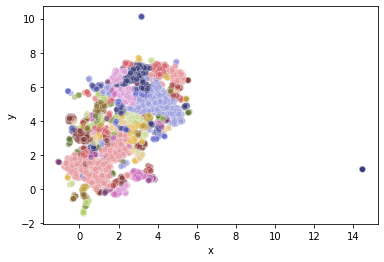

In [126]:
sns.scatterplot(x="x", y = "y", data = scatter_df[(scatter_df['cluster_labels']!=-1)], hue = 'cluster_labels', palette = 'tab20b',legend = False, alpha = 0.5)

## TOP TWEETS

In [127]:
scatter_df['prob'] = clusterer.probabilities_

In [128]:
df_clusters = []
for idx, grp in scatter_df[(scatter_df['cluster_labels']!=-1)].groupby('cluster_labels'):
    sorted_grp = grp.sort_values(by='prob',ascending = False)
    print('Top Tweets for Cluster {} with probabilities {}'.format(idx,sorted_grp['prob'].tolist()[:10]))
    print(sorted_grp['tweets'].tolist()[:10])
    print('-----------------------------------------------------------------')
    
    n = sorted_grp.shape[0]
    df_t = pd.DataFrame()
    df_t['cluster_id'] = [idx]*n
    df_t['tweet'] = sorted_grp['tweets'].tolist()
    df_t['probability'] = sorted_grp['prob'].tolist()
    df_t['screen_name'] = sorted_grp['screen_name'].tolist()
    df_clusters.append(df_t)

Top Tweets for Cluster 0 with probabilities [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9307308292186262, 0.8996730768188398, 0.8774264019298982]
['abhijitmajumder chinesevirus from wuhan reached milan  15000 km newyork  15000 km itlay 8695 km india  3695 km iran  5667 km no effects in beijing amp shanghai something is wrong  potus is right in blaming china for its biowarfare ungeneva unesco bioweapon corona ', 'trehannitika chinesevirus from wuhan reached milan  15000 km newyork  15000 km itlay 8695 km india  3695 km iran  5667 km no effects in beijing amp shanghai something is wrong  potus is right in blaming china for its biowarfare ungeneva unesco bioweapon corona ', 'riturathaur chinesevirus from wuhan reached milan  15000 km newyork  15000 km itlay 8695 km india  3695 km iran  5667 km no effects in beijing amp shanghai something is wrong  potus is right in blaming china for its biowarfare ungeneva unesco bioweapon corona ', 'sacchisadhana chinesevirus from wuhan reached milan  15000 km

Top Tweets for Cluster 84 with probabilities [1.0, 1.0, 1.0, 1.0, 0.9388679241383738, 0.932632012495837, 0.932632012495837, 0.8879526366073194]
['मित्रों  भारत कृषिप्रधान देश हैं  चिन्ता नहीं चिंतन करें। एकस्ट्रा फ़ूड हो तो थोड़ा इनको भी सपॉर्ट कर देना। chinesevirus19 coronavirusoubreak reliefpackage ', 'much of the fakenews in india about the covid19 virus is targeting muslims accusing them of trying to spread the virus deliberately as part of a supposed coronajihad our colleague chowarchis at boomlivein explains ', 'communalism will kill more people in india than the virus will coronavirus coronajihad', 'communal virus is more dangerous than corona virus in india very sad nizamuddinfiasco', 'just see that how the corona positive patients from nizamuddin are spitting intentionally to spread corona virus in india isnt is international conspiracy coronajihad jihadivirus jihadijamat nizamuddinidiots banjahiljamat bantablighijamat tablighijamatvirus covid19 ', 'chinaviruscovid से जनता को 

In [131]:
pd.concat(df_clusters, ignore_index = True).to_excel("./data/covid19_clusters_tweets.xlsx", index = None)